# Ex1: Probability - IRIS

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [ ]:
iris = pd.read_csv('data/Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Nhóm theo loại hoa và tính mean, std
df = iris.groupby('Species').agg([np.mean, np.std])
df

SepalLengthCm           SepalWidthCm           PetalLengthCm  \
                         mean       std         mean       std          mean   
Species                                                                        
Iris-setosa             5.006  0.352490        3.418  0.381024         1.464   
Iris-versicolor         5.936  0.516171        2.770  0.313798         4.260   
Iris-virginica          6.588  0.635880        2.974  0.322497         5.552   

                          PetalWidthCm            
                      std         mean       std  
Species                                           
Iris-setosa      0.173511        0.244  0.107210  
Iris-versicolor  0.469911        1.326  0.197753  
Iris-virginica   0.551895        2.026  0.274650

In [ ]:
# đổi sang array 2 chiều
iris_arr = df.values
iris_arr

array([[5.006     , 0.35248969, 3.418     , 0.3810244 , 1.464     ,
        0.17351116, 0.244     , 0.1072095 ],
       [5.936     , 0.51617115, 2.77      , 0.31379832, 4.26      ,
        0.46991098, 1.326     , 0.19775268],
       [6.588     , 0.63587959, 2.974     , 0.32249664, 5.552     ,
        0.5518947 , 2.026     , 0.27465006]])

In [ ]:
# Ví dụ: 
# tính P(setosa|[x1,x2,x3,x4]) = P(x1|setosa)*P(x2|setosa)*P(x3|setosa)*P(x4|setosa)*P(setosa) / P([x1,x2,x3,x4])
# Do xác suất các loại hoa là như nhau nên chỉ cần tính: P(x1|setosa)*P(x2|setosa)*P(x3|setosa)*P(x4|setosa)
# Hoặc cũng có thể tính log[P(x1|setosa)*P(x2|setosa)*P(x3|setosa)*P(x4|setosa)]
# Cũng chính bằng log[P(x1|setosa)] + log[P(x2|setosa)] + log[P(x3|setosa)] + log[P(x4|setosa)]

# r là thứ tự dòng của loại hoa, X là tập dữ liệu cần dự đoán
def P(r, X):
    p = 0 # tổng xác suất (đổi ra log)
    j = 0 # trong iris_arr: j tham chiếu cột mean (j=0,2,4,6), j+1 tham chiếu cột std
    for i in range(X.size):
        m = iris_arr[r, j] # mean
        s = iris_arr[r, j+1] # std
        p += np.log(st.norm.pdf(x=X[i], loc=m, scale=s))
        j += 2
    return p

### Dự đoán cho X

In [ ]:
X = np.array([6, 3, 2.5, 1.5])

In [ ]:
for i in range(3):
    print('i =', i, 'và p =', P(i, X))

i = 0 và p = -88.7116968142982
i = 1 và p = -7.156855108636962
i = 2 và p = -17.76007906132275


In [ ]:
# chọn i=1 ==> loại hoa versicolor

### Dự đoán cho IRIS

In [ ]:
def P_max(X):
    p_max = P(0, X)
    i_max = 0
    for i in range(1,3):
        p = P(i, X)
        if p>p_max:
            p_max = p
            i_max = i
    return i_max

In [ ]:
lst_p = []
for i, r in iris.iterrows():
    X = r[:4].values
    lst_p.append(P_max(X))
iris['i_predict'] = lst_p

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris['i'] = encoder.fit_transform(iris['Species'])

In [ ]:
iris[iris['i']!=iris['i_predict']] # các dự đoán SAI

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,i_predict,i
Id,,,,,,,
53,6.9,3.1,4.9,1.5,Iris-versicolor,2,1
71,5.9,3.2,4.8,1.8,Iris-versicolor,2,1
78,6.7,3.0,5.0,1.7,Iris-versicolor,2,1
107,4.9,2.5,4.5,1.7,Iris-virginica,1,2
120,6.0,2.2,5.0,1.5,Iris-virginica,1,2
134,6.3,2.8,5.1,1.5,Iris-virginica,1,2


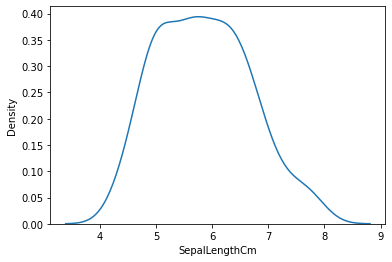

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.histplot(iris['SepalLengthCm'], kde=True)
sns.kdeplot(iris['SepalLengthCm'])
plt.show()